In [1]:
 #necessary libraries
import pandas as pd                   # For data manipulation and analysis
import matplotlib.pyplot as plt       # For data visualization
import seaborn as sns                 # For enhanced data visualization
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.feature_extraction.text import TfidfVectorizer  # For converting text data into numerical features using TF-IDF
from sklearn.naive_bayes import MultinomialNB         # For implementing the Naive Bayes classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # For evaluating the model's performance


In [2]:
# Load the dataset from the specified file path
data = pd.read_csv('/content/drive/MyDrive/intern dataset/spam.csv')

# Map the 'Category' column to numerical values
# 'ham' is mapped to 0 (non-spam), and 'spam' is mapped to 1 (spam)
data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})


In [3]:
# Separate the feature (message text) and the target (category)
X = data['Message']  # X contains the text of the emails
y = data['Category']  # y contains the labels: 0 for ham, 1 for spam

# Split the data into training and testing sets
# 80% of the data will be used for training, and 20% will be used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Initialize the TF-IDF Vectorizer with English stop words
vectorizer = TfidfVectorizer(stop_words='english')

# Fit the vectorizer on the training data and transform the training data into TF-IDF features
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data using the already fitted vectorizer
X_test_tfidf = vectorizer.transform(X_test)


In [5]:
# Initialize the Multinomial Naive Bayes model
model = MultinomialNB()

# Train the model using the TF-IDF features from the training data
model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [6]:
# Make predictions on the test data using the trained model
y_pred = model.predict(X_test_tfidf)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)          # The ratio of correctly predicted instances
precision = precision_score(y_test, y_pred)        # The ratio of true positives to all predicted positives
recall = recall_score(y_test, y_pred)              # The ratio of true positives to all actual positives
f1 = f1_score(y_test, y_pred)                      # The harmonic mean of precision and recall

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')


Accuracy: 0.9767
Precision: 1.0000
Recall: 0.8255
F1-Score: 0.9044


<Figure size 800x600 with 0 Axes>

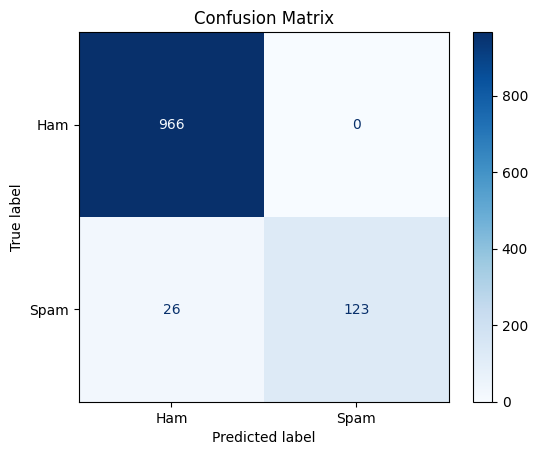

In [7]:
# Import necessary libraries for confusion matrix and its display
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix for the test data
# labels=[0, 1] specifies the order of the labels: 0 for Ham and 1 for Spam
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Create a ConfusionMatrixDisplay object to visualize the confusion matrix
# display_labels specifies the labels for the confusion matrix: 'Ham' and 'Spam'
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
cm_display.plot(cmap=plt.cm.Blues)  # Use a color map to visualize the matrix
plt.title('Confusion Matrix')      # Set the title of the plot
plt.show()                         # Display the plot


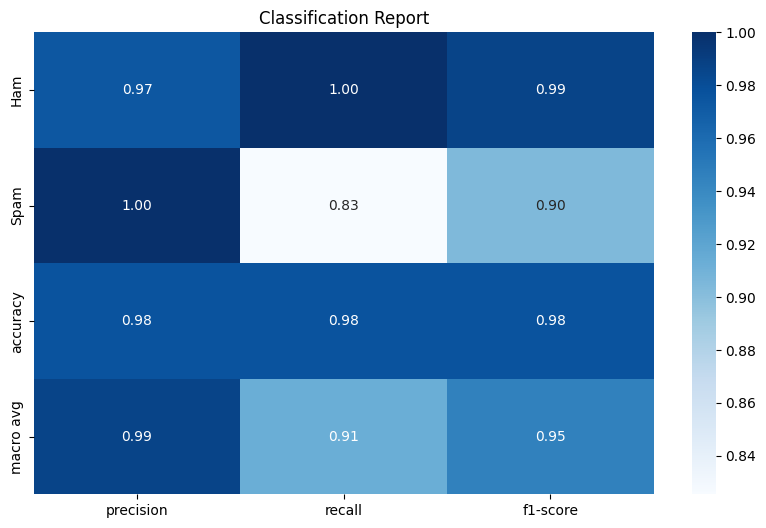

In [8]:
# Import necessary library for classification report
from sklearn.metrics import classification_report

# Generate a classification report
# target_names specifies the labels for the report: 'Ham' and 'Spam'
# output_dict=True returns the report as a dictionary
report = classification_report(y_test, y_pred, target_names=['Ham', 'Spam'], output_dict=True)

# Convert the classification report dictionary to a DataFrame for easier visualization
report_df = pd.DataFrame(report).transpose()

# Plot the classification report as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f')
plt.title('Classification Report')  # Set the title of the plot
plt.show()  # Display the plot
